# Bidirectional LSTM Model

In [2]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
# import the packages that will be used
import numpy as np 
import pandas as pd 
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [3]:
# load amazon dataset
amazon_df=pd.read_csv("/content/drive/MyDrive/Henkel/Code+paper/sentiment labelled sentences/amazon_cells_labelled.txt",delimiter='\t',
                        header=None, 
                        names=['review', 'sentiment'])

In [4]:
amazon_df.head(5)

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [7]:
# load imdb dataset
imdb_df = pd.read_csv("/content/drive/MyDrive/Henkel/Code+paper/sentiment labelled sentences/imdb_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['review', 'sentiment'])

In [6]:
imdb_df.head(5)

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [9]:
# load yelp dataset
yelp_df = pd.read_csv("/content/drive/MyDrive/Henkel/Code+paper/sentiment labelled sentences/yelp_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['review', 'sentiment'])

In [10]:
yelp_df.head(5)

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [13]:
#merge datasets
df=pd.concat([amazon_df,yelp_df,imdb_df])

In [14]:
df.reset_index(drop='True',inplace=True)
df.head(5)

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [15]:
#check the shape
df.shape

(2748, 2)

In [16]:
#Extracting Reviews and Sentiments
sentences=data['review'].tolist()
label=data['sentiment'].tolist()

In [17]:
# print examples of sentences and labels
print("Sentences")
for i in range(10):
    #print(sentences[i],end="\n")
    print("{} {}".format(sentences[i],label[i]))

Sentences
So there is no way for me to plug it in here in the US unless I go by a converter. 0
Good case, Excellent value. 1
Great for the jawbone. 1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!! 0
The mic is great. 1
I have to jiggle the plug to get it to line up right to get decent volume. 0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one. 0
If you are Razr owner...you must have this! 1
Needless to say, I wasted my money. 0
What a waste of money and time!. 0


In [24]:
#Create A Subword Datasets
vocab_size=1000
tokenizer=tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences,vocab_size,max_subword_length=5)

In [25]:
print("vocab size is",vocab_size)

#check the tokenizer words
num=1
print(sentences[num])
encoded_sentence=tokenizer.encode(sentences[num])
print(encoded_sentence)

vocab size is 1000
Good case, Excellent value.
[586, 485, 534, 2, 811, 862, 514, 678, 428, 165, 843, 788]


In [26]:
for i in encoded_sentence:
    print(tokenizer.decode([i]))

Go
od 
case
, 
E
x
cell
ent 
va
lu
e
.


## Create sequences for training by encoding each individual sentence

In [27]:
#This is equivalent to text_to_sequences with the Tokenizer
for i,sent in enumerate(sentences):
    sentences[i]=tokenizer.encode(sent)

#print some encoded text
for i in range(10):
    print(sentences[i],end="\n")

[346, 774, 164, 774, 7, 217, 539, 23, 141, 9, 854, 165, 36, 18, 19, 281, 19, 1, 827, 825, 774, 56, 488, 6, 292, 192, 5, 119, 124, 236, 788]
[586, 485, 534, 2, 811, 862, 514, 678, 428, 165, 843, 788]
[305, 774, 23, 1, 848, 219, 104, 49, 788]
[826, 239, 14, 9, 344, 93, 23, 119, 124, 65, 405, 3, 47, 110, 20, 271, 215, 794, 738, 505, 126, 788, 819, 807, 816, 821, 824, 774, 822, 824, 821, 808, 818, 811, 819, 825, 740]
[15, 384, 362, 7, 51, 788]
[6, 43, 9, 848, 259, 415, 17, 1, 854, 165, 36, 9, 226, 18, 9, 604, 774, 254, 569, 774, 9, 226, 55, 37, 145, 152, 165, 111, 788]
[373, 48, 43, 39, 686, 52, 310, 500, 30, 105, 39, 686, 52, 394, 218, 298, 774, 533, 173, 857, 2, 689, 774, 205, 559, 459, 774, 1, 395, 774, 12, 692, 629, 774, 177, 250, 12, 668, 63, 192, 527, 788]
[373, 48, 41, 824, 839, 864, 25, 671, 84, 640, 48, 437, 8, 43, 544, 857, 775]
[820, 240, 842, 488, 9, 65, 863, 2, 6, 480, 14, 32, 674, 788]
[423, 54, 5, 480, 774, 12, 674, 774, 4, 184, 611]


In [28]:
# each Sentence have different encoded Length 
# sequence need to be paded to make the length of all sentences same

max_length =50
trunc_type='post'
padding_type='post'

#pad all Sequence

sequence_added=pad_sequences(sentences,maxlen=max_length,padding =padding_type,truncating=trunc_type)

In [29]:
#check
sequence_added

array([[346, 774, 164, ...,   0,   0,   0],
       [586, 485, 534, ...,   0,   0,   0],
       [305, 774,  23, ...,   0,   0,   0],
       ...,
       [636, 774,   5, ...,   0,   0,   0],
       [811, 862,  37, ...,   0,   0,   0],
       [337,  52,  19, ...,   0,   0,   0]], dtype=int32)

In [30]:
# split the data sets into training and test data

training_size=int(len(sentences)*0.8)
train_seq=sequence_added[:training_size]
train_labels=label[:training_size]

test_seq=sequence_added[training_size:]
test_labels=label[training_size:]

train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [31]:
print("Total Training Sequence are",len(train_seq))
print("Total Test Sequence are",len(test_seq))

Total Training Sequence are 2198
Total Test Sequence are 550


## Bulding Bidirectional LSTM Model

In [32]:
#Create a Model
embedding_dim=16
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [33]:
#fit a model
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 26,701
Trainable params: 26,701
Non-trainable params: 0
_________________________________________________________________


In [34]:
history=model.fit(train_seq,train_labels,epochs=50,validation_data=(test_seq,test_labels))

Epoch 1/50
69/69 [==============================] - 11s 71ms/step - loss: 0.6905 - accuracy: 0.5323 - val_loss: 0.6833 - val_accuracy: 0.5855
Epoch 2/50
69/69 [==============================] - 4s 51ms/step - loss: 0.5987 - accuracy: 0.7402 - val_loss: 0.6514 - val_accuracy: 0.6073
Epoch 3/50
69/69 [==============================] - 4s 51ms/step - loss: 0.5299 - accuracy: 0.8016 - val_loss: 0.6707 - val_accuracy: 0.6273
Epoch 4/50
69/69 [==============================] - 4s 51ms/step - loss: 0.4733 - accuracy: 0.8476 - val_loss: 0.6504 - val_accuracy: 0.6127
Epoch 5/50
69/69 [==============================] - 4s 51ms/step - loss: 0.4317 - accuracy: 0.8753 - val_loss: 0.6490 - val_accuracy: 0.6364
Epoch 6/50
69/69 [==============================] - 4s 52ms/step - loss: 0.4004 - accuracy: 0.8908 - val_loss: 0.7820 - val_accuracy: 0.6127
Epoch 7/50
69/69 [==============================] - 4s 54ms/step - loss: 0.3736 - accuracy: 0.8963 - val_loss: 0.7632 - val_accuracy: 0.6218
Epoch 8/50
6

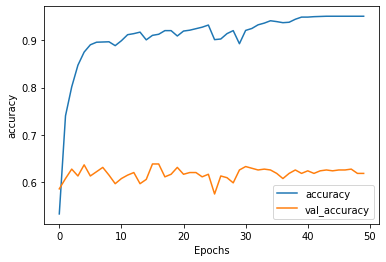

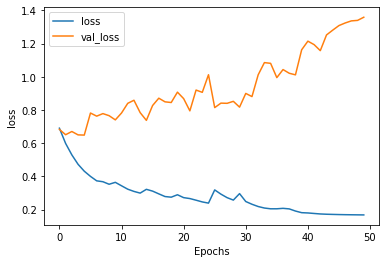

In [36]:
# Plotting the accuracy and loss
def plot_graphs(history, string):
        plt.plot(history.history[string])
        plt.plot(history.history['val_'+string])
        plt.xlabel("Epochs")
        plt.ylabel(string)
        plt.legend([string, 'val_'+string])
        plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Define a function to predict the sentiment of reviews 

In [37]:
def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequence=True ):
    # Keep the original sentences so that we can keep using them later
    # Create an array to hold the encoded sequences
    new_sequences = []

    # Convert the new reviews to sequences
    for i, frvw in enumerate(new_sentences):
        new_sequences.append(tokenizer.encode(frvw))

    trunc_type='post' 
    padding_type='post'

    # Pad all sequences for the new reviews
    new_reviews_padded = pad_sequences(new_sequences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)             

    classes = model.predict(new_reviews_padded)

    # The closer the class is to 1, the more positive the review is
    for x in range(len(new_sentences)):

        # We can see the padded sequence if desired
        # Print the sequence
        if (show_padded_sequence):
              print(new_reviews_padded[x])
        # Print the review as text
        print(new_sentences[x])
        # Print its predicted class
        print(classes[x])
        print("\n")

In [38]:
# The higher the sentiment value is to 1, the more positive the review is.
# Use the model to predict some reviews   
fake_reviews = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]

predict_review(model, fake_reviews)

[  6 370  16  42   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.99972665]


[665 432 101 774  13 108 280   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.99976087]


[665 432 101 774  13 135   8 147 173  22  45   6 540  71   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.99922156]


[665 432 101 774  13 190 240 852   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.12084681]


[  1 135 149  39 178  14 5